In [101]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import new_attributes 
from wordcloud import WordCloud

In [137]:
df = pd.read_csv('parsing.csv', index_col = 'Unnamed: 0')

In [138]:
df

,Модель,Цена,Год выпуска,Пробег,Привод,ЛС,Тип двигателя,Тип кузова,Коробка передач,Объем двигателя,Цвет,Запас хода
0,Kia Carnival IV,4379000,2020,26000,передний,202,Дизель,минивэн,автомат,2.2,чёрный,NaN
1,Kia Carnival III,2519000,2018,43000,передний,202,Дизель,минивэн,автомат,2.2,чёрный,NaN
2,Tesla Model X Plaid I Рестайлинг,15490000,2022,70,полный,1020,Электро,внедорожник 5 дв.,NaN,NaN,чёрный,Заряд на 547 км
3,LADA (ВАЗ) Vesta I,1330000,2021,9000,передний,113,Бензин,седан,вариатор,1.6,белый,NaN
4,McLaren 765LT,59500000,2021,1311,задний,765,Бензин,купе,робот,4.0,фиолетовый,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3697,LADA (ВАЗ) Priora I,200000,2009,203000,передний,98,Бензин,хэтчбек 5 дв.,механика,1.6,чёрный,NaN
3698,Skoda Superb I Рестайлинг,1145000,2008,53000,передний,150,Бензин,седан,автомат,1.8,серый,NaN
3699,Lexus NX 200t I,2758000,2015,93211,полный,238,Бензин,внедорожник 5 дв.,автомат,2.0,красный,NaN
3700,Renault Kangoo I,90000,2001,220000,передний,80,Дизель,компактвэн,механика,1.9,серый,NaN


# Пропуски и дубликаты

In [139]:
pd.DataFrame.drop_duplicates(df, inplace = True) # дропним дубликаты, поскольку некоторые объявления
df.isnull().sum()                                # попали в данные по нескольку раз. 

Модель                0
Цена                  0
Год выпуска           0
Пробег                0
Привод                0
ЛС                    0
Тип двигателя         0
Тип кузова            0
Коробка передач      26
Объем двигателя      26
Цвет                  0
Запас хода         2532
dtype: int64

   Как можно видеть, у нас есть пропуски в данных о запасе хода для автомобилей с ДВС, о коробке передач и объеме двигателя для электромобилей. 
 
   Так как пропуски в первом признаке составляют большую часть, мы вовсе его удалим. А пропуски по электромобилям в коробке передач и объеме двигателя мы заполним следующими данными: поскольку коробка передач является категориальным признаком, а в электромобилях ее нет, мы заменим пропуски на автомат, так как по механике вождения они ничем не отличаются (а для покупателей это одно и то же), а объем двигателя заменим на среднее, так как это в среднем достаточно мощные автомобили.

In [140]:
df.drop('Запас хода', axis=1, inplace=True)
df['Коробка передач'].fillna('автомат', inplace=True)
df['Объем двигателя'].fillna(round(df['Объем двигателя'].mean(), 1), inplace=True)

df = df.rename(columns={"Объем двигателя": "Объём двигателя"})  # мы любим русский язык

In [141]:
df

,Модель,Цена,Год выпуска,Пробег,Привод,ЛС,Тип двигателя,Тип кузова,Коробка передач,Объём двигателя,Цвет
0,Kia Carnival IV,4379000,2020,26000,передний,202,Дизель,минивэн,автомат,2.2,чёрный
1,Kia Carnival III,2519000,2018,43000,передний,202,Дизель,минивэн,автомат,2.2,чёрный
2,Tesla Model X Plaid I Рестайлинг,15490000,2022,70,полный,1020,Электро,внедорожник 5 дв.,автомат,2.4,чёрный
3,LADA (ВАЗ) Vesta I,1330000,2021,9000,передний,113,Бензин,седан,вариатор,1.6,белый
4,McLaren 765LT,59500000,2021,1311,задний,765,Бензин,купе,робот,4.0,фиолетовый
...,...,...,...,...,...,...,...,...,...,...,...
3691,Hyundai Sonata VIII (DN8),2949000,2020,49538,передний,183,Бензин,седан,автомат,1.6,белый
3692,Kia Rio II Рестайлинг,379000,2009,175645,передний,97,Бензин,хэтчбек 5 дв.,механика,1.4,серый
3693,Toyota Venza I Рестайлинг,1849000,2013,131320,полный,185,Бензин,внедорожник 5 дв.,автомат,2.7,коричневый
3699,Lexus NX 200t I,2758000,2015,93211,полный,238,Бензин,внедорожник 5 дв.,автомат,2.0,красный


In [142]:
df.isnull().sum() 

Модель             0
Цена               0
Год выпуска        0
Пробег             0
Привод             0
ЛС                 0
Тип двигателя      0
Тип кузова         0
Коробка передач    0
Объём двигателя    0
Цвет               0
dtype: int64

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2558 entries, 0 to 3701
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Модель           2558 non-null   object 
 1   Цена             2558 non-null   int64  
 2   Год выпуска      2558 non-null   int64  
 3   Пробег           2558 non-null   int64  
 4   Привод           2558 non-null   object 
 5   ЛС               2558 non-null   int64  
 6   Тип двигателя    2558 non-null   object 
 7   Тип кузова       2558 non-null   object 
 8   Коробка передач  2558 non-null   object 
 9   Объём двигателя  2558 non-null   float64
 10  Цвет             2558 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 239.8+ KB


Кратко опишем данные: пока что у нас 11 признаков, 5 из которых (цена, год выпуска, пробег, ЛС, объем двигателя) являются числовыми, а 6 (модель, привод, тип двигателя, тип кузова, коробка передач, цвет) - категориальными.

Ура, мы избавились от пропусков и дубликатов, теперь можем переходить к визуализации и дальнейшей обработке данных!

# Визуализация

Для начала хотелось бы посмотреть на корреляцию наших числовых признаков с ценой (натуральным логарифмом цены).

<Figure size 100x100 with 0 Axes>

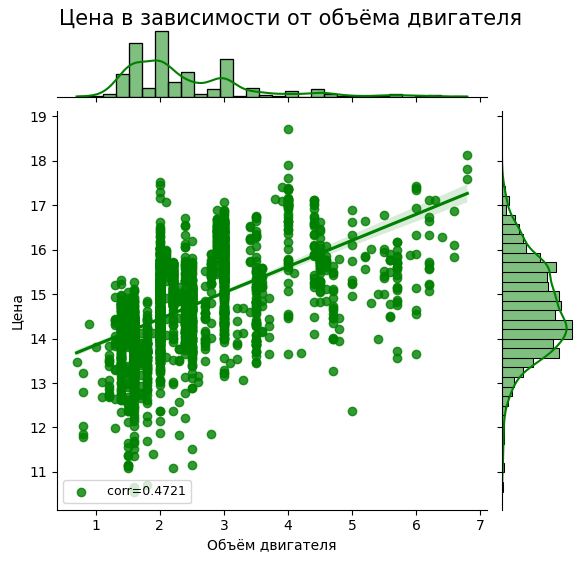

In [151]:
plt.figure(figsize=(1, 1))
p = sns.jointplot(data=df, x = df['Объём двигателя'], y = np.log(df['Цена']), kind="reg",
              label = ' corr='
                + str('%.4f' % np.corrcoef(df['Объём двигателя'], df['Цена'])[0][1]),color = 'g')
plt.legend(loc='lower left', fontsize = 9)
p.fig.suptitle('Цена в зависимости от объёма двигателя', y=0.93, fontsize = 15)
p.fig.subplots_adjust(top=0.90)


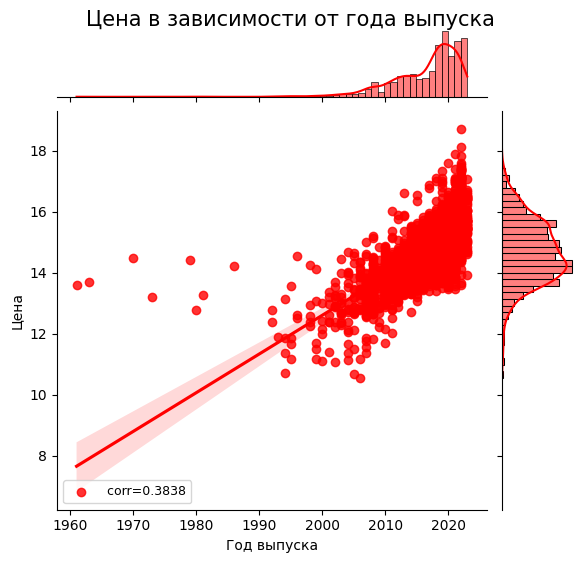

In [152]:
p = sns.jointplot(data=df, x = df['Год выпуска'], y = np.log(df['Цена']), kind="reg",
              label = ' corr='
                + str('%.4f' % np.corrcoef(df['Год выпуска'], df['Цена'])[0][1]),color = 'r')
plt.legend(loc='lower left', fontsize = 9)
p.fig.suptitle('Цена в зависимости от года выпуска', y=0.93, fontsize = 15)
p.fig.subplots_adjust(top=0.90)

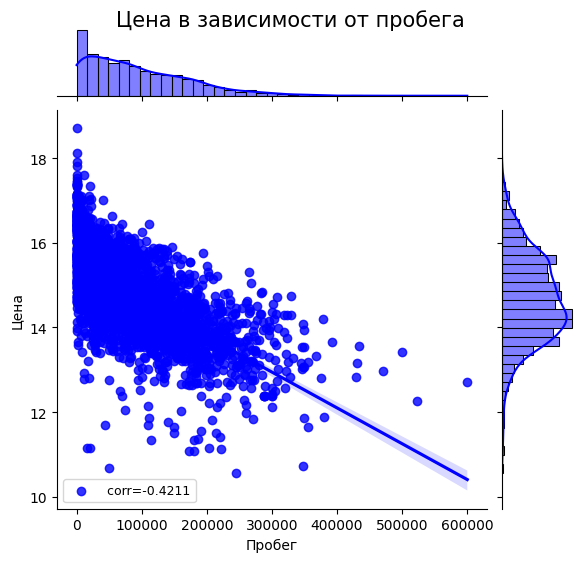

In [153]:
p = sns.jointplot(data=df, x = df['Пробег'], y = np.log(df['Цена']), kind="reg",
              label = ' corr='
                + str('%.4f' % np.corrcoef(df['Пробег'], df['Цена'])[0][1]),color = 'b')
plt.legend(loc='lower left', fontsize = 9)
p.fig.suptitle('Цена в зависимости от пробегa', y=0.93, fontsize = 15)
p.fig.subplots_adjust(top=0.90)

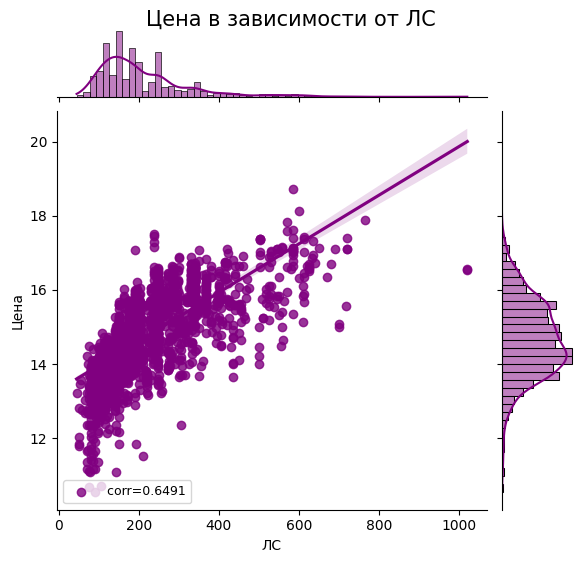

In [154]:
p = sns.jointplot(data=df, x = df['ЛС'], y = np.log(df['Цена']), kind="reg",
              label = ' corr='
                + str('%.4f' % np.corrcoef(df['ЛС'], df['Цена'])[0][1]),color = 'purple')
plt.legend(loc='lower left', fontsize = 9)
p.fig.suptitle('Цена в зависимости от ЛС', y=0.93, fontsize = 15)
p.fig.subplots_adjust(top=0.90)

__Вывод:__ Мы можем видеть по графикам, что цена больше всего зависит от года выпуска и мощности автомобиля, обратно зависит от пробега и не зависит напрямую от объема двигателя. Также у нас есть выброс, машина по цене 135 млн. руб., но к обработке данных мы приступим позже.

## Самые популярные цвета

(-0.5, 1599.5, 799.5, -0.5)

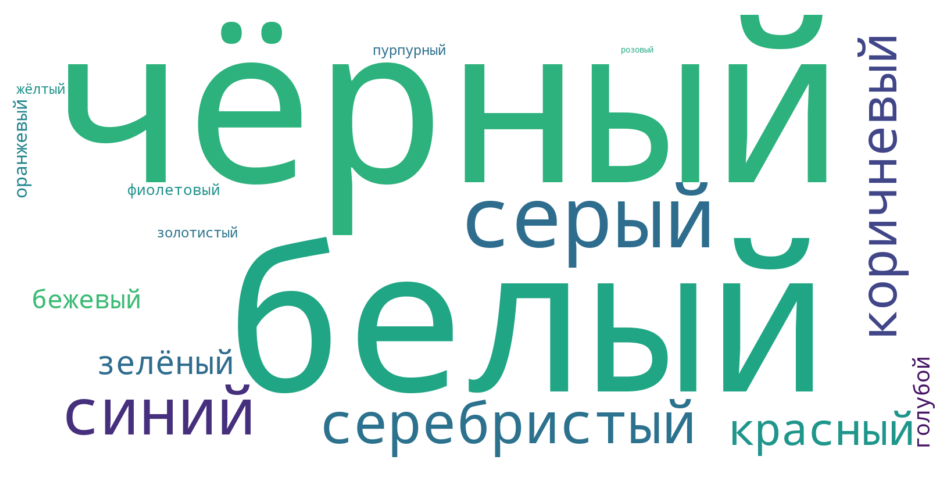

In [155]:
plt.figure(figsize=(12, 12))
df_string = df['Цвет'].to_string()
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(df_string)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

### Вернемся к более серьезному анализу и построим распределение числовых признаков

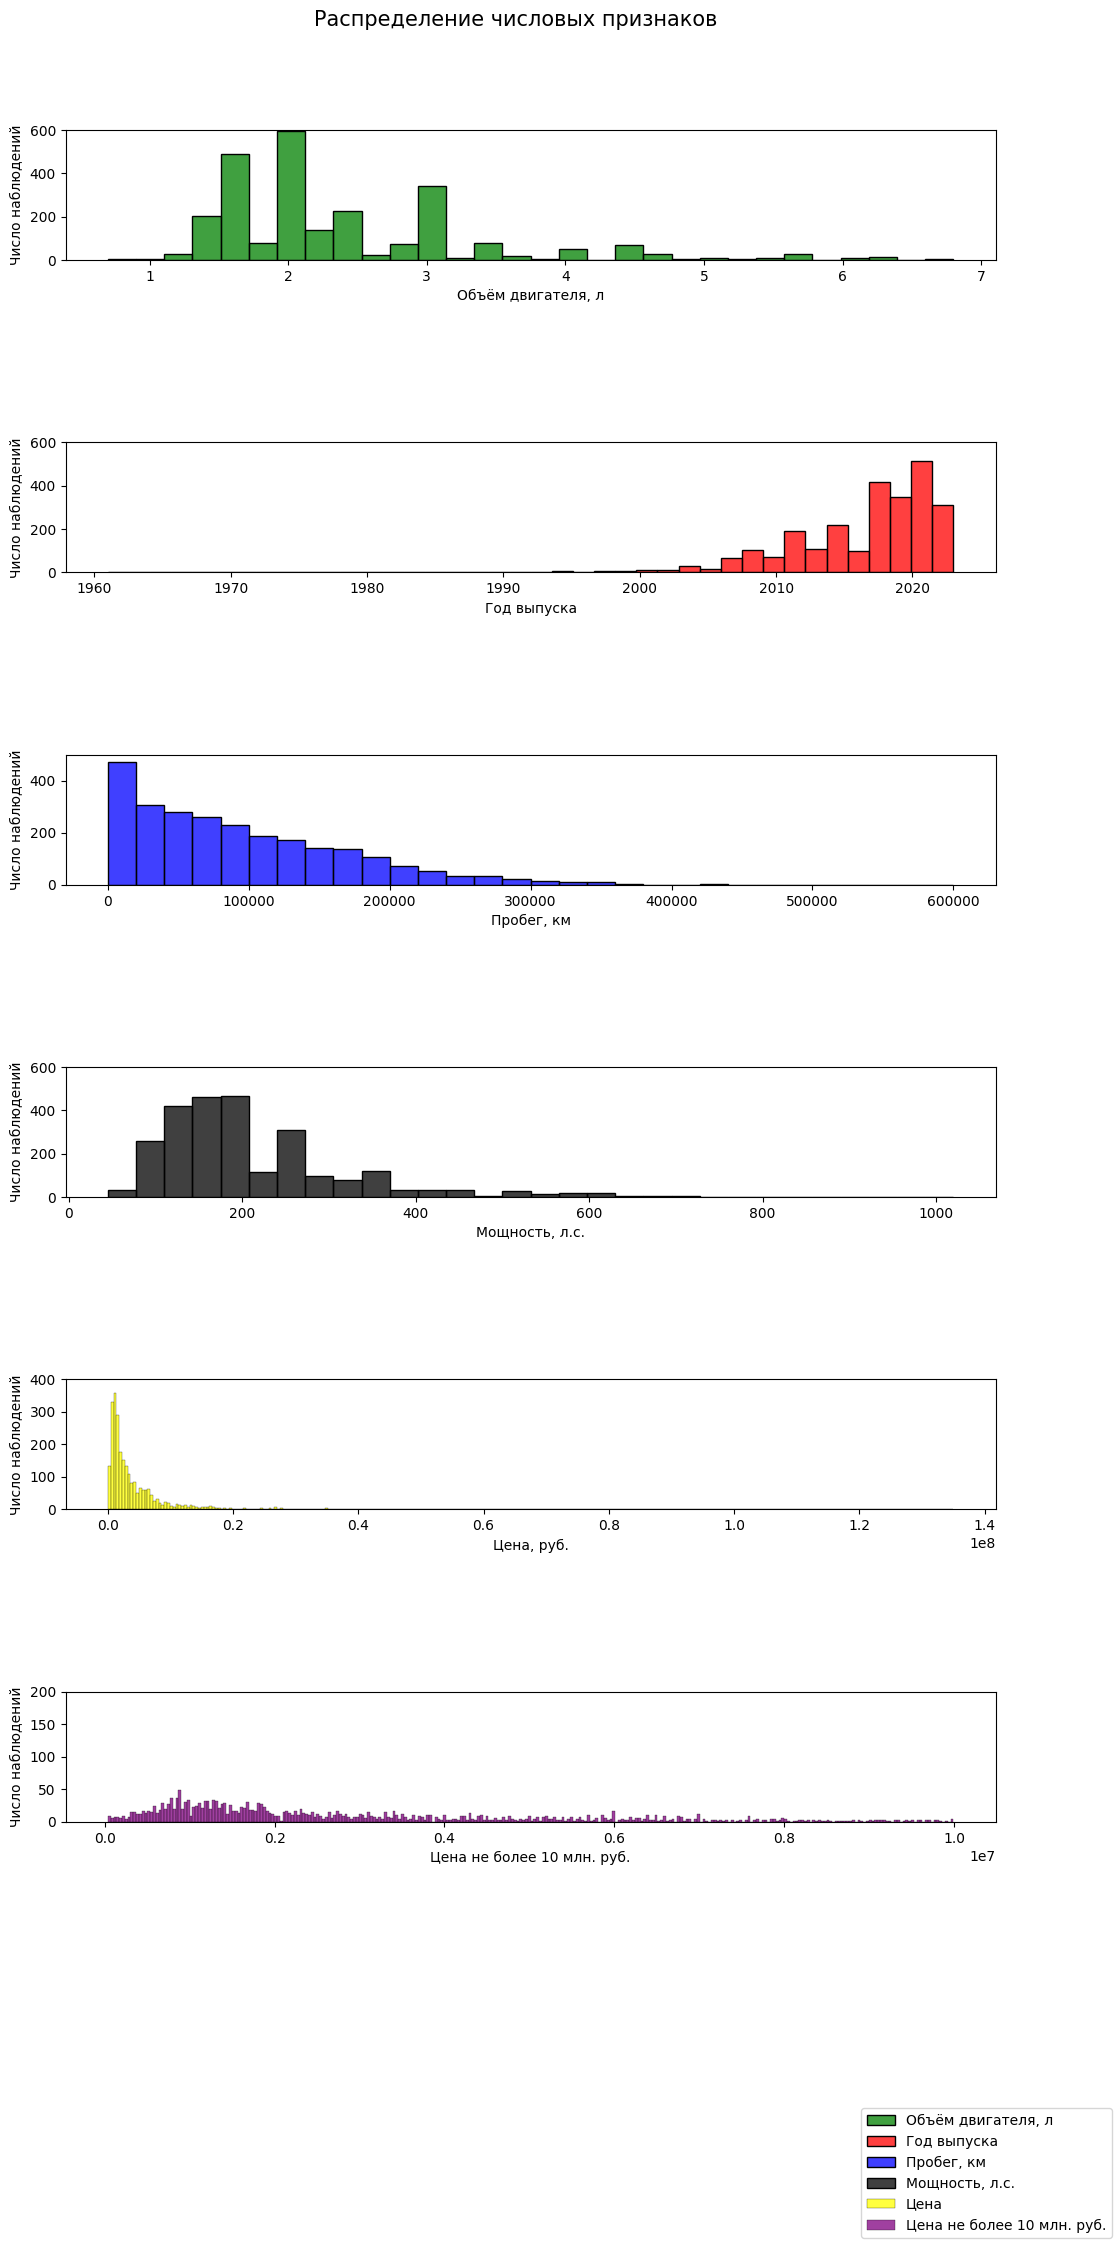

In [156]:
fig = plt.figure(figsize=(12, 24))
fig.suptitle('Распределение числовых признаков', y=0.93, fontsize=15)

plt.subplot(12, 1, 1)
sns.histplot(df['Объём двигателя'], 
             label = 'Объём двигателя, л', bins = 30, color = 'g').set_ylim(0, 600)

plt.xlabel('Объём двигателя, л')
plt.ylabel('Число наблюдений')

plt.subplot(12, 1, 3)
sns.histplot(df['Год выпуска'],
             label = 'Год выпуска', bins = 40, color = 'r').set_ylim(0, 600)

plt.xlabel('Год выпуска')
plt.ylabel('Число наблюдений')

plt.subplot(12, 1, 5)
sns.histplot(df['Пробег'], 
             label = 'Пробег, км', bins = 30, color = 'b').set_ylim(0, 500)

plt.xlabel('Пробег, км')
plt.ylabel('Число наблюдений')

plt.subplot(12, 1, 7)
sns.histplot(df['ЛС'], 
             label = 'Мощность, л.с.', bins = 30, color = 'black').set_ylim(0, 600)

plt.xlabel('Мощность, л.с.')
plt.ylabel('Число наблюдений')

plt.subplot(12, 1, 9)
sns.histplot(df['Цена'], 
             label = 'Цена', bins = 300, color = 'yellow').set_ylim(0, 400)

plt.xlabel('Цена, руб.')
plt.ylabel('Число наблюдений')

plt.subplot(12, 1, 11)
sns.histplot(df[df['Цена'] <= 10000000]['Цена'], 
             label = 'Цена не более 10 млн. руб.', bins = 300, color = 'purple').set_ylim(0, 200)

plt.xlabel('Цена не более 10 млн. руб.')
plt.ylabel('Число наблюдений')

fig.legend(loc='lower right');

__Вывод:__ Ни одно из распределений не похоже на нормальное, почти везде есть 'тяжелые' хвосты

## Добавим новые переменные

### Марка

Выделим марку машины - так как это может быть важной категориальной переменной (более/менее премиально, также лучшее/худшее отношение к марке).

In [157]:
df['Марка'] = df['Модель'].str.split(' ').str[0]
df.loc[df['Марка'] == 'Land', 'Марка'] = 'Land Rover'

df['Марка'].value_counts()[:10]

Mercedes-Benz    265
Kia              249
BMW              221
Hyundai          202
Toyota           178
Volkswagen       175
Skoda            137
Nissan           103
Audi              90
Lexus             87
Name: Марка, dtype: int64

(-0.5, 1599.5, 799.5, -0.5)

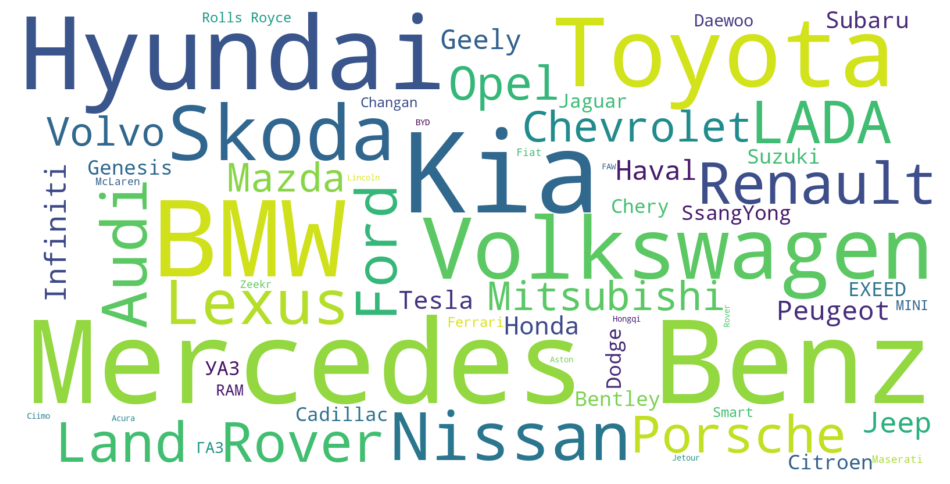

In [158]:
plt.figure(figsize=(12, 12))
df_string = df['Марка'].to_string()
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(df_string)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

### Налог

Относительно важный критерий при выборе машины - сумма транспортного налога, которую за неё придётся платить. Соответственно, данная цифра учитывается в спросе и, таким образом, влияет на цену.

Налог рассчитывается с ожиданием, что покупатель проездит на машине год; учитываюся ставки для Москвы, рассчитывается по формуле с сайта ФНС.

In [159]:
df = new_attributes.nalog_calc(df)

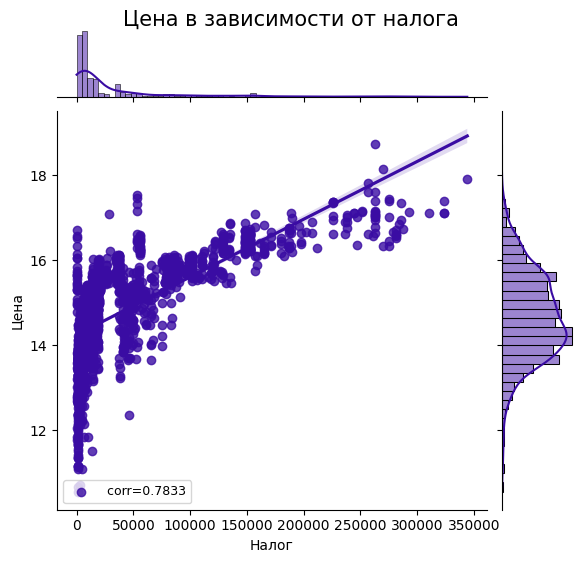

In [160]:
p = sns.jointplot(data=df, x = df['Налог'], y = np.log(df['Цена']), kind="reg",
              label = ' corr='
                + str('%.4f' % np.corrcoef(df['Налог'], df['Цена'])[0][1]),color = '#3A0CA3')
plt.legend(loc='lower left', fontsize = 9)
p.fig.suptitle('Цена в зависимости от налога', y=0.93, fontsize = 15)
p.fig.subplots_adjust(top=0.90)

__Вывод:__ налог коррелирован с ценой.

### Класс машины

In [161]:
df = new_attributes.class_(df)

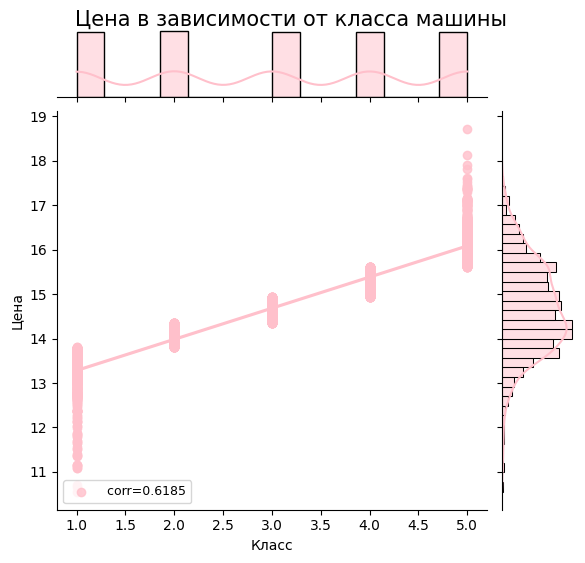

In [162]:
p = sns.jointplot(data=df, x = df['Класс'], y = np.log(df['Цена']), kind="reg",
              label = ' corr='
                + str('%.4f' % np.corrcoef(df['Класс'], df['Цена'])[0][1]),color = 'pink')
plt.legend(loc='lower left', fontsize = 9)
p.fig.suptitle('Цена в зависимости от класса машины', y=0.93, fontsize = 15)
p.fig.subplots_adjust(top=0.90)

__Вывод:__ так как классность машины зависит от цены напрямую, то на данном графике можно видеть, по сути, разделение на квантили.

## Выводы

В ходе EDA был проведён анализ полученных из объявлений переменных и сделаны наглядные умозаключения о характере их распределений и связей, а также добавлены три новых параметра.

Как показано выше, никакой из показателей не является нормально распределённым (хотя логарифм цена примерно нормально распределён), что говорит о большем количестве выбросов (от которых мы избавимся дальше) и в целом несбалансированных данных (что объясняется особенностями объявлений на авто.ру).

Сильных корреляций между данными нет, хотя наблюдается определённая положительная связь между ЛС и ценой, а также ценой и параметрами которые функционально от неё зависят (налог, класс).